In [9]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

from ic import output, initialize, plotsa

In [10]:
from collections import OrderedDict
planets = ['b', 'c', 'd', 'e', 'f', 'g', 'h']
resonances = OrderedDict([(('b','c'),(8,5)),(('c','d'),(5,3)),(('d','e'),(3,2)),(('e','f'),(3,2)),(('f','g'),(4,3)),(('g','h'),(3,2))]) # ordered so we add planets in right sequence
threebodyresonances = OrderedDict([(('b','c','d'),(2,3)),(('c','d','e'),(1,2)),(('d','e','f'),(2,3)),(('e','f','g'),(1,2)),(('f','g','h'),(1,1))])

In [11]:
import matplotlib.lines as mlines

def plotscaling(mag, taues):
    fig, axarr = plt.subplots(ncols=1, nrows=3, figsize=(18,10))
    colors = ['red','blue','green','cyan','magenta','yellow','black']
    handles = []

    for i, taue in enumerate(taues[-2:]):
        filename='data/mag{0:.4e}taue{1:.2e}.bin'.format(mag,taue)
        sa = rebound.SimulationArchive(filename)

        color = colors[i]

        Nout = len(sa)
        N = sa[0].N

        outputs = initialize(planets, resonances, threebodyresonances)
        E = np.zeros(Nout)
        Lz = np.zeros(Nout)
        for i,sim in enumerate(sa):
            ps = sim.particles
            output(sim,planets,resonances,threebodyresonances,outputs)
            E[i] = sim.calculate_energy()
            x,y,Lz[i] = sim.calculate_angular_momentum()

        t, e, P, Pratio, phi1, phi2, deltapomega, phi3body = outputs
        compressionfactor = 1.e6*(taue/100)
        for key in t.keys():
            t[key] = [time/compressionfactor for time in t[key]]

        for p in planets:
            axarr[0].plot(t[p], e[p], '.', color=color, alpha=0.1)

        for resonance in resonances.items():
            pair = resonance[0]
            res = resonance[1]
            resratio = res[0]/res[1] 
            axarr[1].plot(t[pair], np.array(Pratio[pair])-resratio, '.', color=color, alpha=0.1)
            
        axarr[2].plot(t['b'], E, '.', color=color, alpha=0.1)
        #for resonance in threebodyresonances.items():
        #    triad = resonance[0]
        #    axarr[1].plot(t[triad], phi3body[triad], '.', color=color, alpha=0.1)

        handles.append(mlines.Line2D([], [], color='white', marker='.',markersize=15, markerfacecolor=color, label="{0:.1e}".format(taue)))

    for ax in axarr.flatten():
        ax.legend(handles=handles, numpoints=1, loc='upper left')
    
    return fig

0.001


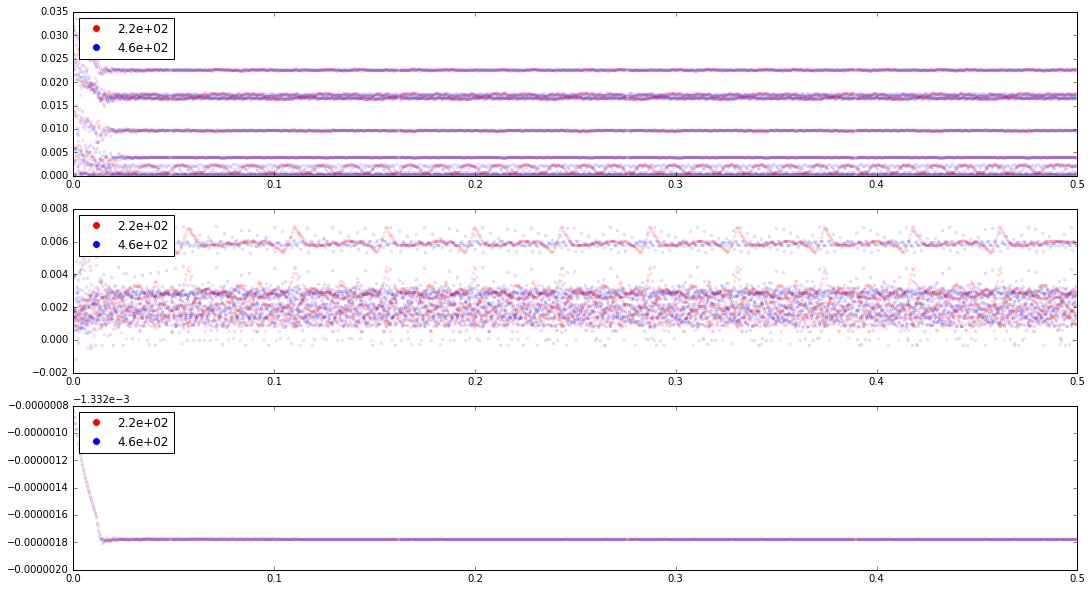

In [12]:
taues = np.logspace(2,3,4)
taues = taues[:-1]
mags = [1.e-3,1.e-1,1]

mag = mags[0]
print(mag)

plotscaling(mag, taues);

0.001


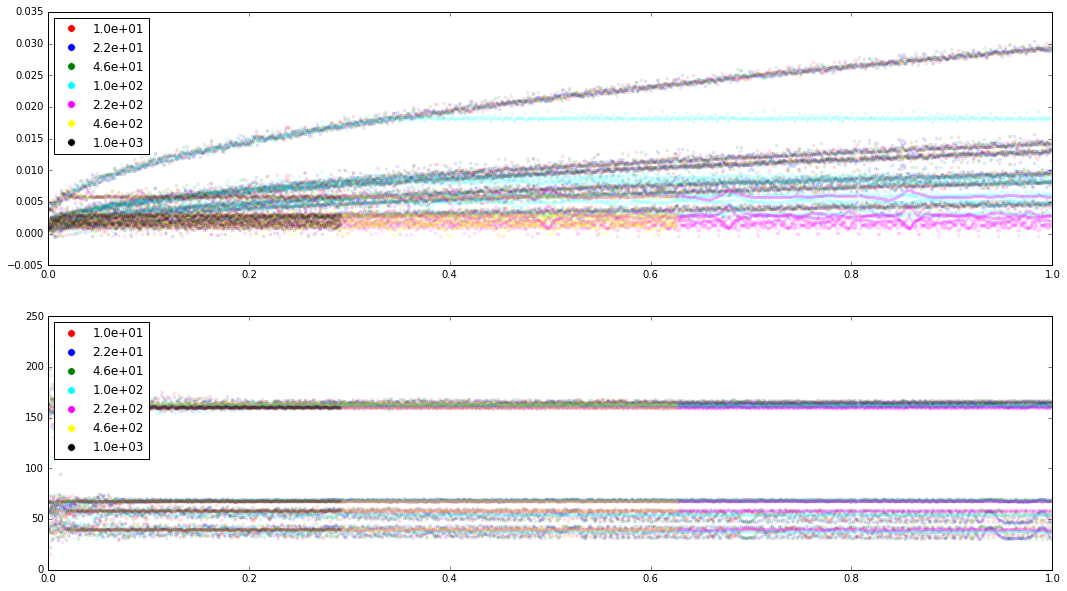

In [5]:
mag = mags[1]
print(mag)

plotscaling(mag, taues);

0.01


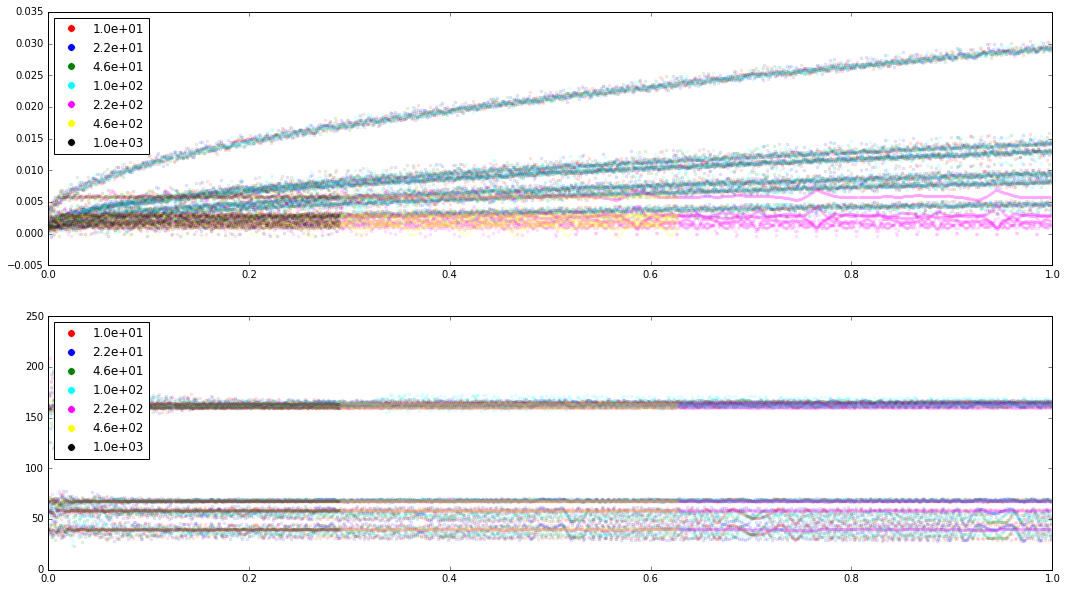

In [6]:
mag = mags[2]
print(mag)

plotscaling(mag, taues);

0.1


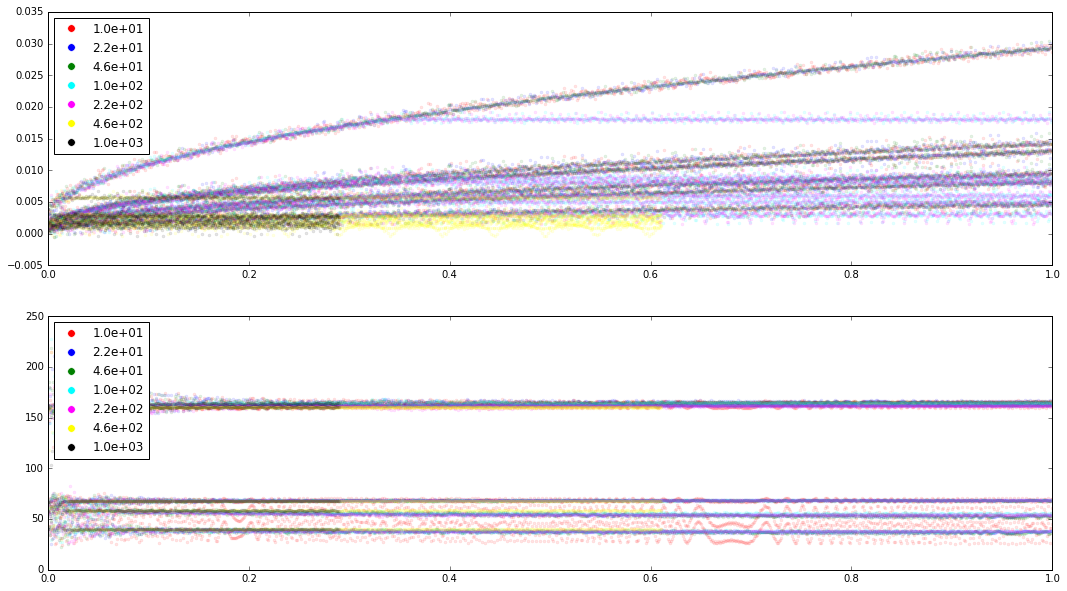

In [7]:
mag = mags[3]
print(mag)

plotscaling(mag, taues);

1


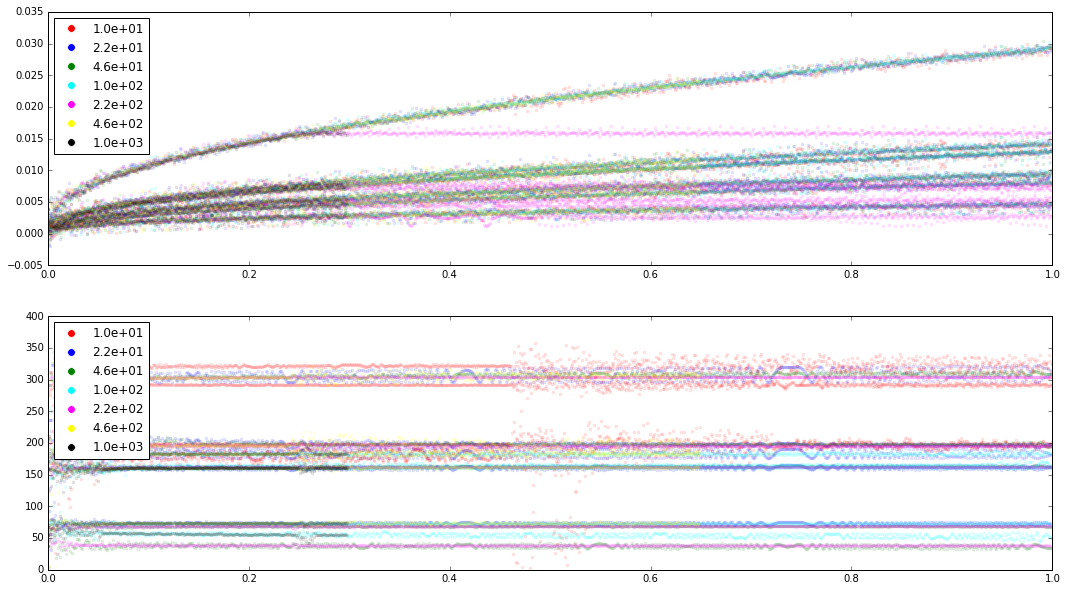

In [8]:
mag = mags[4]
print(mag)

plotscaling(mag, taues);

215.443469003 0.1


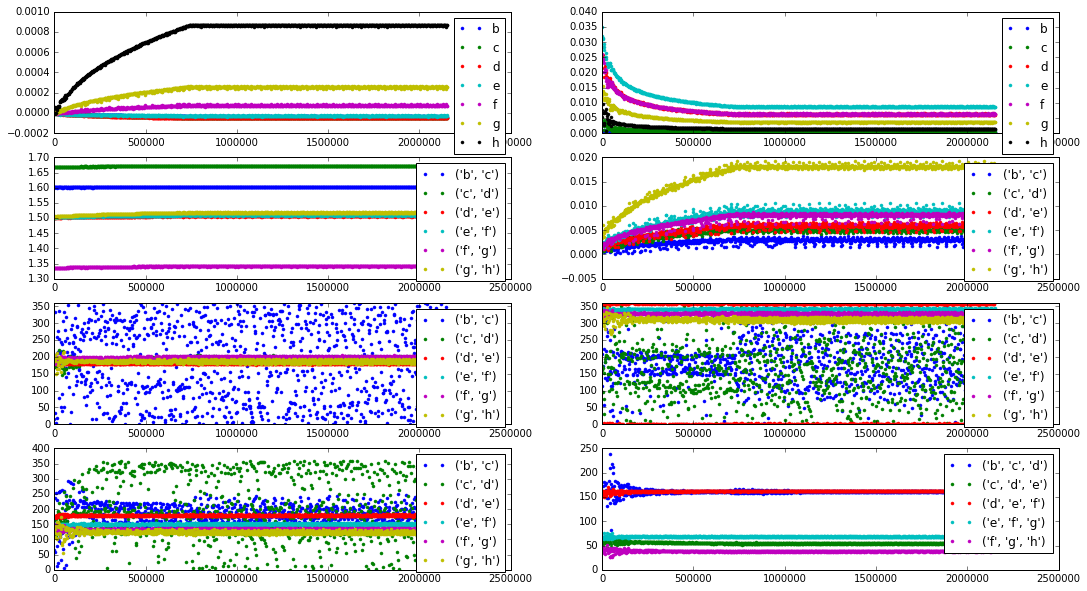

In [20]:
import matplotlib.lines as mlines

taues = np.logspace(1,3,7)
mags = mags = [0,1.e-3,1.e-2,1.e-1,1]

mag = mags[3]
taue= taues[-3]
print(taue, mag)

filename='data/mag{0:.4e}taue{1:.2e}.bin'.format(mag,taue)
sa = rebound.SimulationArchive(filename)
plotsa(sa,planets,resonances,threebodyresonances, loc='upper right');

100.0 1
b 0.004086475613582725
c 0.006557689169021772
d 0.010981642059955046
e 0.01658047447467578
f 0.02510552422870353
g 0.03379625425300865
h 0.051689755178221095
('b', 'c') 1.6047297938656888
('c', 'd') 1.6746207050849298
('d', 'e') 1.5098356315160806
('e', 'f') 1.5141619901799857
('f', 'g') 1.3461680363706117
('g', 'h') 1.529452192874881


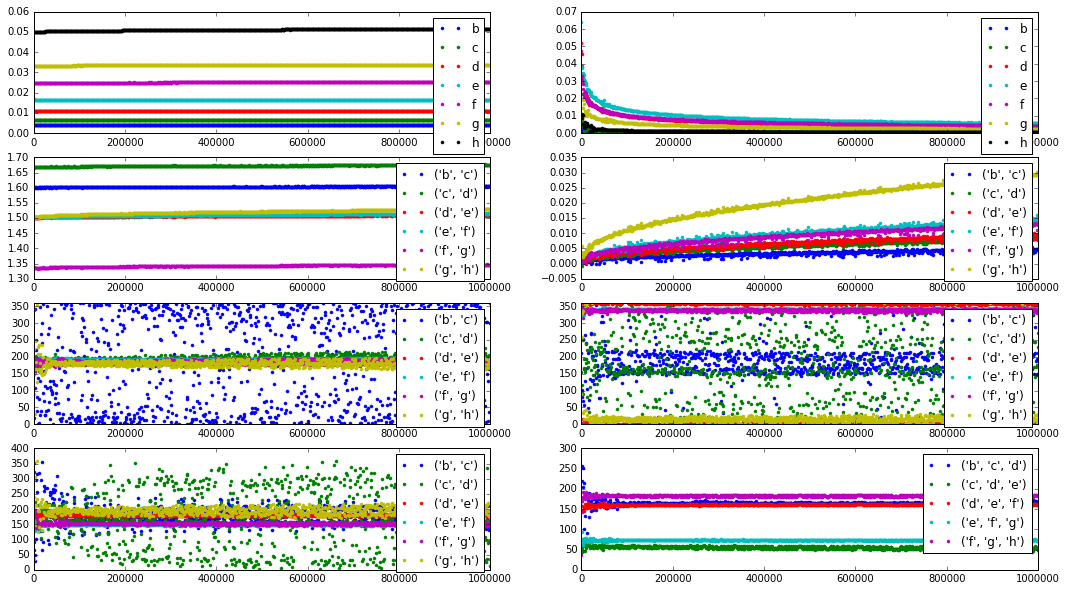

In [5]:
from ic import plotpratioscale
import matplotlib.lines as mlines

taues = np.logspace(1,3,7)
mags = mags = [0,1.e-3,1.e-2,1.e-1,1]

mag = mags[-1]
taue= taues[-4]
print(taue, mag)

filename='data/mag{0:.4e}taue{1:.2e}.bin'.format(mag,taue)
sa = rebound.SimulationArchive(filename)
plotsa(sa,planets,resonances,threebodyresonances, loc='upper right');

In [8]:
import matplotlib.lines as mlines

taues = np.logspace(1,3,7)
mags = mags = [0,1.e-3,1.e-2,1.e-1,1]

mag = mags[3]
taue= taues[-3]
print(taue, mag)

filename='data/mag{0:.4e}taue{1:.2e}.bin'.format(mag,taue)
sa = rebound.SimulationArchive(filename)

215.443469003 0.1


In [9]:
sa.Nblob

999

In [10]:
E = []
e1 = []
e2 = []
t = []
for i,sim in enumerate(sa):
    E.append(sim.calculate_energy())
    e1.append(sim.particles[1].e)
    e2.append(sim.particles[2].e)
    t.append(sim.t)

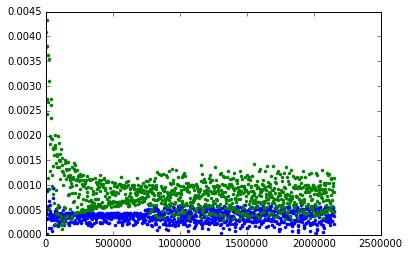

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(t,e1,'.')
ax.plot(t,e2,'.')

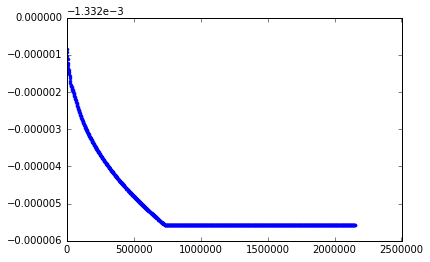

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(t,E,'.')

In [19]:
np.array(E[-100:]).mean()

-0.0013375811521304317

In [5]:
sim = sa[500]

In [22]:
taue

215.44346900318823

In [6]:
rebx = reboundx.Extras(sim)
damping = rebx.add("tides_synchronous_ecc_damping")
 
ps = sim.particles
aref = ps[1].a
mref = ps[1].m
for p in ps[1:]:
    p.params["tides_synchronous_tau_e"] = -taue*(p.m/mref)*(p.a/aref)**6.5

rebx.integrator="rk4"
damping.force_as_operator = 1
damping.operator_order = 1

In [7]:
sim.step()

In [ ]:
Nout = 1000
times = np.linspace(sim.t, sim.t+1.e3, Nout)